#  PRÁCTICA 7 CAN-GIA. Representación de funciones escalares de dos variables  

Los módulos **Matplotlib** y **SymPy** tienen varias herramientas para trabajar con funciones de varias variables y representar las gráficas asociadas. En esta práctica, revisaremos cómo representar funciones escalares de dos variables usando superficies y curvas de nivel. En ambos casos, veremos cómo hacer estas representaciones gráficas tanto en **Matplotlib** como en **SymPy**. También veremos cómo representar gráficamente superficies de nivel. Por último, veremos las dificultades que conlleva el cálculo de límites de funciones de varias variables.

## Objetivos

- Representación de funciones escalares de dos variables con **Matplotlib** y **SymPy**.
- Representación gráfica de superficies de nivel.
- Cálculo de límites de funciones de varias variables.

# Representación gráfica de funciones con Matplotlib

Es necesario importar los módulos **NumPy** y **Matplotlib**. Además, también necesitamos importar la interface `pyplot` de **Matplotlib**. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

## Representación de funciones escalares de dos variables 

Consideremos la función de dos variables:
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right),\qquad (x,y)\in[-\pi,\pi]\times[-\pi,\pi].
$$
No es fácil visualizar la forma de esta función. Una vía para trazar una imagen es crear una representación mediante un mapa de colores o con curvas de nivel. Para ello, dibujamos una cuadrícula de puntos y  posteriormente evaluamos la función en esos puntos. Los puntos generados en el proceso de evaluación permiten visualizar la función.

In [ ]:
N = 50  # Consideramos 50 puntos en cada dirección de los ejes
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

El siguiente paso es crear una cuadrícula (o nube) de puntos $(x, y)$, para posteriormente evaluar la función: 

In [6]:
X, Y = np.meshgrid(x,y)
f = np.sin(X)*np.cos((X*Y**2)/10)
#display(X,Y)

Para representar la función usando un mapa de colores usamos la función de **Matplotlib** `plt.contourf`:

Locator attempting to generate 2001 ticks ([-1.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


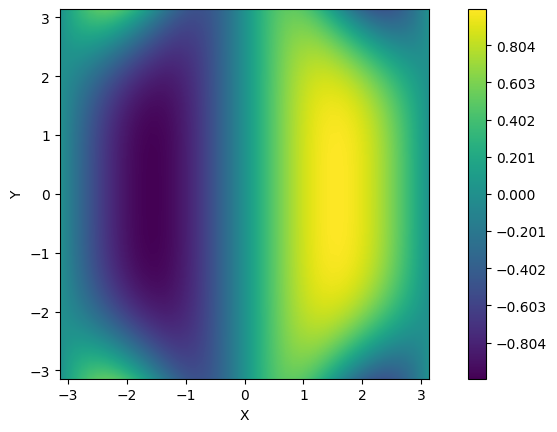

In [7]:
plt.contourf(X,Y,f,2000)
# Añadimos la barra de colores con los valores de la función
plt.colorbar()  

# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()

Para crear una representación gráfica con las curvas de nivel, usaremos `plt.contour`:

In [ ]:
p = plt.contour(X,Y,f,16) # 16 : número de lineas
# Añadimos el valor numérico a cada curva de nivel
plt.clabel(p) 
# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()

La función `plt.contour` admite el argumento opcional `level` para indicar el número de curvas de nivel a representar o fijar los valores de las curvas a representar. 

Otra manera de representar las funciones es usar una gráfica tridimensional con ejes $X$, $Y$, y $Z$. Para crear una gráfica tridimensional en **Matplotlib**, es necesario incluir módulos extra específicos del espacio 3D:

In [ ]:
from mpl_toolkits.mplot3d import axes3d
# Creación de la figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación de la superficie z = f(x,y)
surf = ax.plot_surface(X,Y,f)  
# Etiquetamos los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Punto de vista del observador: elevación
ax.view_init(elev=15)
plt.show()

### Ejercicio 1

Sea 
$$
f(x, y) = \dfrac{ x^2\,y}{(x^5+y^2)},\qquad (x,y)\in[-3,3]\times[-3,3]\,.
$$
Representa $f$ gráficamente empleando mapas de colores, curvas de nivel y la superficie asociada.

/tmp/ipykernel_108078/1641340478.py:7: RuntimeWarning: divide by zero encountered in divide
  f = (X**2*Y)/(X**5+Y**2)


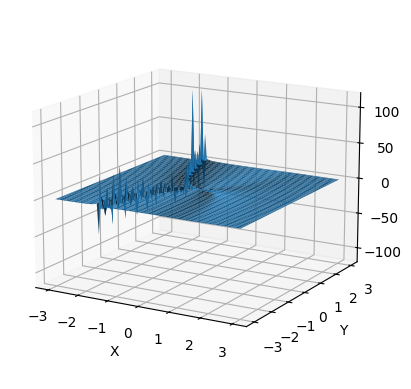

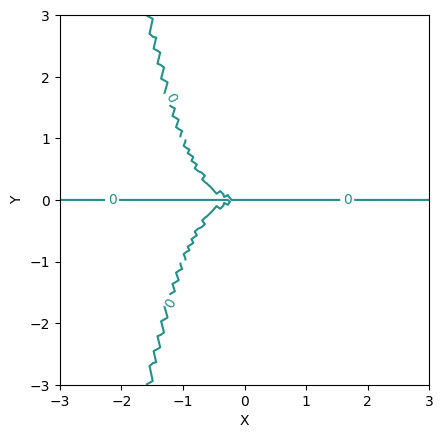

In [8]:
#TU CÓDIGO AQUÍ
N = 100  # Consideramos 100 puntos en cada dirección de los ejes
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)

X, Y = np.meshgrid(x,y)
f = (X**2*Y)/(X**5+Y**2)

# Creación de la figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")

# Representación de la superficie z = f(x,y)
surf = ax.plot_surface(X,Y,f)  
# Etiquetamos los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Punto de vista del observador: elevación
ax.view_init(elev=15)
plt.show()
p = plt.contour(X,Y,f,1)
# Añadimos el valor numérico a cada curva de nivel
plt.clabel(p) 
# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()


### Ejercicio 2

Define una función de dos variables y represéntala gráficamente en la región del plano $[1,2]\times[0,1]$ empleando mapas de colores, curvas de nivel y la superficie asociada.

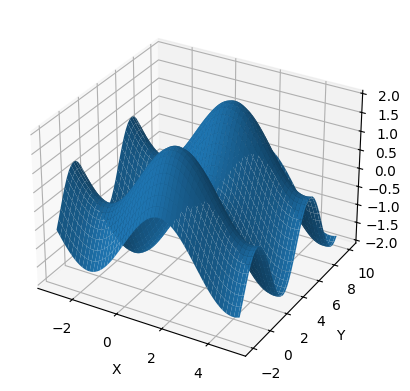

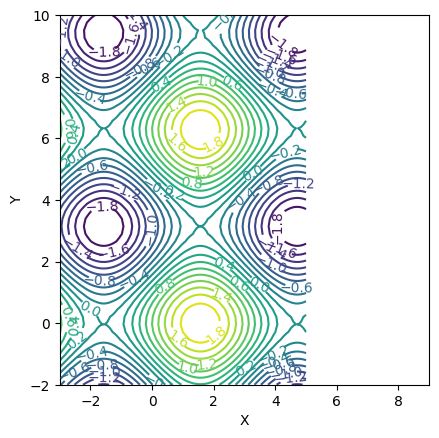

In [9]:

#TU CÓDIGO AQUÍ
 # Consideramos 50 puntos en cada dirección de los ejes
x = np.linspace(-3, 5, 100)
y = np.linspace(-2, 10, 50)
X, Y = np.meshgrid(x,y)
f = np.sin(X)+np.cos(Y)
# Creación de la figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación de la superficie z = f(x,y)
surf = ax.plot_surface(X,Y,f)  
# Etiquetamos los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Punto de vista del observador: elevación
ax.view_init(elev=30)
plt.show()
p = plt.contour(X,Y,f,25)
# Añadimos el valor numérico a cada curva de nivel
plt.clabel(p) 
# Etiquetamos los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('square')
plt.show()

# Representación gráfica con SymPy

Para trabajar con **Matplotlib** es necesario emplear un conjunto de puntos donde se evalúan las funciones que se quieren representar y las gráficas son una aproximación de lo que se quiere representar.

Vamos a representar gráficamente con **SymPy** los ejemplos vistos anteriormente.

In [3]:
import sympy as sp

### Representación de funciones escalares de dos variables

En **Sympy** no es posible representar gráficamente mapas de colores o curvas de nivel. La única opción para representar funciones de dos variables es dibujar la superficie $z=f(x,y)$. Para ello, procedemos como sigue:

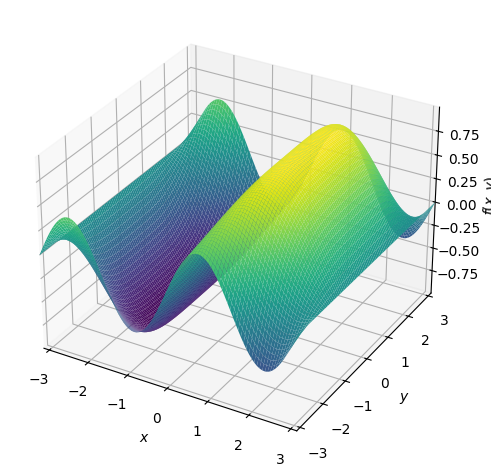

In [2]:
x, y = sp.symbols('x y', real=True)
z = sp.sin(x) * sp.cos((x*y**2)/10)

p = sp.plotting.plot3d(z, (x, -sp.pi, sp.pi), (y, -sp.pi, sp.pi))

p.xlabel='X'
p.ylabel='Y'
p.zlabel='Z'

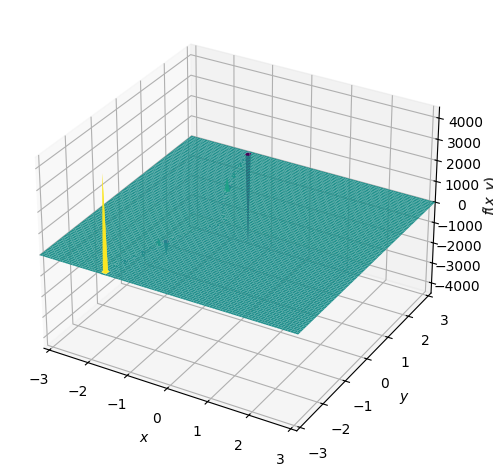

In [4]:
x, y = sp.symbols('x y', real=True)
f = (x**2*y)/(x**5+y**2)
p = sp.plotting.plot3d(f, (x, -sp.pi, sp.pi), (y, -sp.pi, sp.pi))
p.xlabel='X'
p.ylabel='Y'
p.zlabel='Z'

Para evaluar una expresión simbólica de dos variables, escribimos:

In [5]:
display(f)
# Evaluamos la expresión f usando "subs"
print('Valor de f(2,1) = ',f.subs({x:2,y:1})) 

x**2*y/(x**5 + y**2)

Valor de f(2,1) =  4/33


En el caso de funciones, la evaluación se realizará como se hace habitualmente. 
Para emplear funciones en **SymPy**, debemos emplear la función sp.Lambda:

In [6]:
F = sp.Lambda((x,y),f) # Función de dos variables definida usando Lambda
display(F)
print('Valor de F(2,1) = ',F(2,1)) # Evaluación de una función mediante sus argumentos
print(F(x,y)==f)

Lambda((x, y), x**2*y/(x**5 + y**2))

Valor de F(2,1) =  4/33
True


Podemos definir funciones a trozos.

In [7]:
f = sp.Piecewise((1/(x*y), (x>0) & (y>0)),(1, x<0), (0, True))
F = sp.Lambda((x,y), f)
display(F,F(1,2),F(0,0))

Lambda((x, y), Piecewise((1/(x*y), (x > 0) & (y > 0)), (1, x < 0), (0, True)))

1/2

0

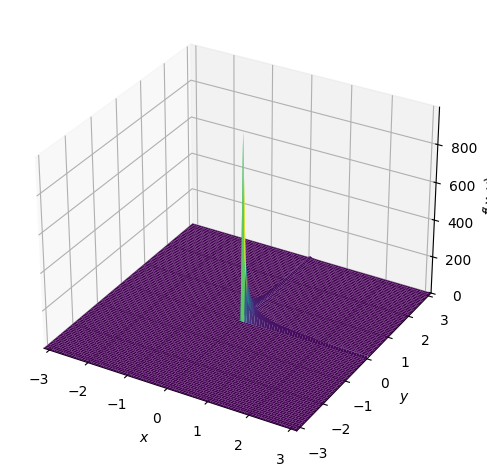

In [8]:
x, y = sp.symbols('x y', real=True)
f = sp.Piecewise((1/(x*y), (x>0) & (y>0)),(1, x<0), (0, True))
p = sp.plotting.plot3d(f, (x, -sp.pi, sp.pi), (y, -sp.pi, sp.pi))
p.xlabel='X'
p.ylabel='Y'
p.zlabel='Z'

### Ejercicio 3

Representa las funciones de los ejercicios 4.1 y 4.2 usando **SymPy**.

In [ ]:
#TU CÓDIGO AQUÍ

### Superficies de nivel ###
En el caso de funciones escalares de tres variables las curvas de nivel vistas se sustituyen por las denominadas superficies de nivel. Necesitamos disponer de algunas librerías en la visualización 3D. Para representar en algunos casos sencillos ejecutamos los siguientes códigos.

In [ ]:
!pip -q install scikit-image  # asegura la instalación 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
    
def isosurface(M,v,step,title=""):
    """
    returns the isosurface of value v of M, subsetting M with the steps argument
    """
    # Get the vertices and faces of a given isosurface
    sel = np.arange(0,np.shape(M)[0],step)
    verts, faces, normals, values = measure.marching_cubes(M[np.ix_(sel,sel,sel)], v, spacing=(1,1,1))
    # Plot in 3D with a fixed scaling in all Cartesian axis
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=.1, cmap="Blues") # cmap : escala de colores
    scaling = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    ax.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)

    # Turn off tick labels
    ax.set_zticklabels([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

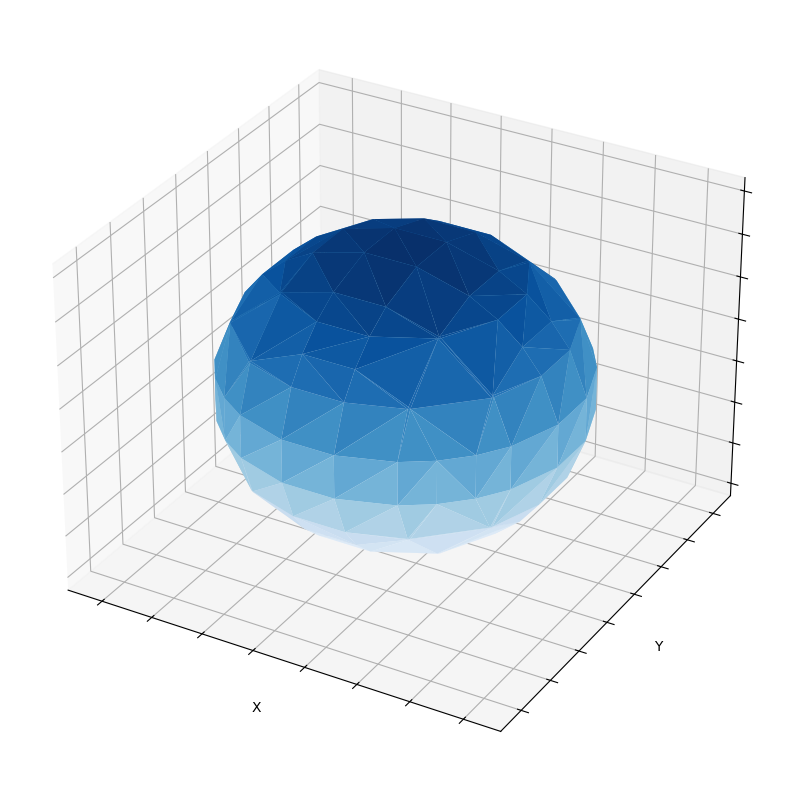

In [23]:
# Representa la esfera de radio 1
p = np.linspace(-15,15,100)
x, y, z = np.meshgrid(p, p, p)
values = x*x + y*y + z*z - 1.
isosurface(values, 0., 1)

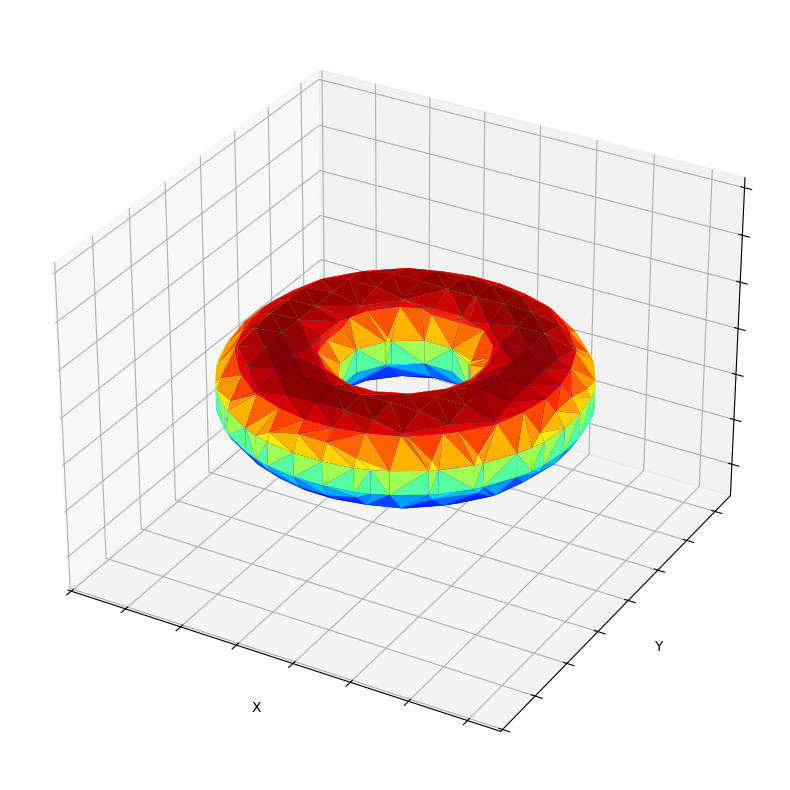

In [11]:
# Representar un toro de radio exterior (R) e interior (r)
p = np.linspace(-25.,25,100)
R = 2; r = 1
x, y, z = np.meshgrid(p, p, p)
values = (R - np.sqrt(x**2 + y**2))**2 + z**2 - r**2
isosurface(values, 0., 1)

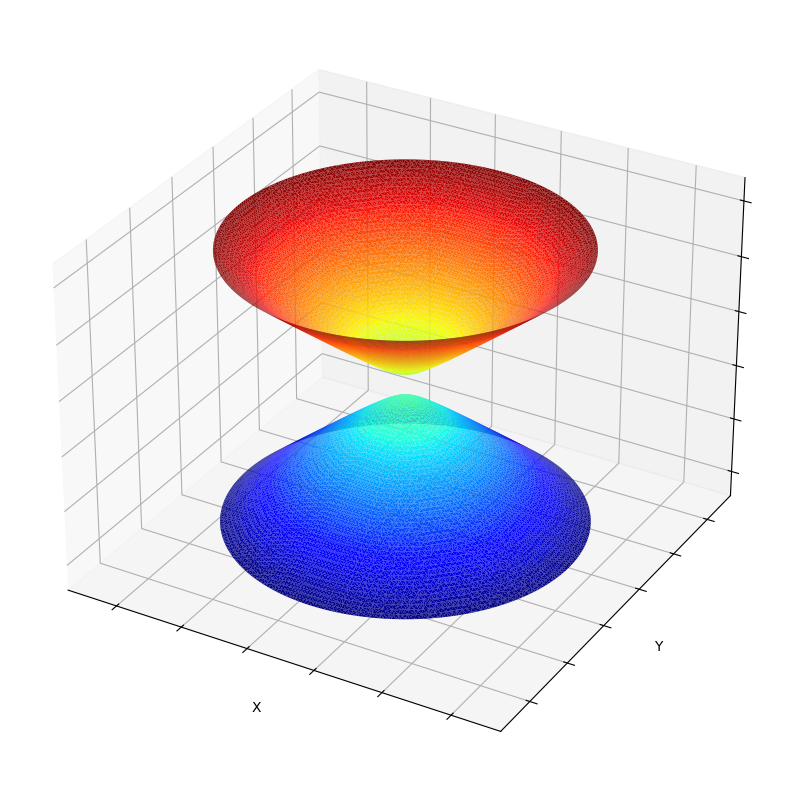

In [12]:
# Hiperboloide de dos hojas
p = np.linspace(-10.,10,100)
x, y, z = np.meshgrid(p, p, p)
values = z**2 - y**2 -x**2 - 1.
isosurface(values, 0., 1)

### Límites de expresiones en varias variables  
El cálculo de límites en varias variables se complica respecto a una variable, dado que hay que analizar todos los caminos posibles para poder asegurar que el límite existe. La función `limit` actúa sobre funciones de una sola variable, de ahí que busquemos expresar una variable en términos de la otra.
Por ejemplo, en el caso de la función $f(x,y)=\frac{x^2y}{x^5+y^2}$, podemos tener valores diferentes según el camino escogido para llegar al punto $(0,0)$. Por ejemplo, si nos aproximamos al origen por rectas que pasan por ese punto, obtenemos:

In [32]:
# Se definen las variables simbólicas x e y
x, y = sp.symbols('x y', real=True) 
# Se define la función simbólica f(x,y) de dos variables

f = sp.Lambda((x,y), x**2 * y/(x**5+y**2)) 

# Se calcula el límite fijando el valor de y
L1 = sp.limit(f(x,y),x,0) 

# Se calcula el límite fijando el valor de x
L2 = sp.limit(L1,y,0)

print(L1)
print(L2)

0
0


In [33]:
#TU CÓDIGO AQUÍ

L3 = sp.limit(f(x,y),y,0) 

L4 = sp.limit(L3,x,0)

display(L3)



display(sp.limit(f(x,x**2),x,0)) 


0

1

In [26]:
m = sp.Symbol('m', real=True)

display(f(x,m*x))

# Cálculo del límite por las rectas de pendiente m
sp.limit(f(x,m*x),x,0) 

m*x**3/(m**2*x**2 + x**5)

0

In [27]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
f = x**2 * y / (x**5 + y**2)

# Límite iterado 1: x -> 0, luego y -> 0
L_iter1 = sp.limit(sp.limit(f, x, 0), y, 0)

# Límite iterado 2: y -> 0, luego x -> 0
L_iter2 = sp.limit(sp.limit(f, y, 0), x, 0)

# Límite sobre la trayectoria y = x^2
L_trayectoria = sp.limit(f.subs(y, x**2), x, 0)

print(f"Iterado 1: {L_iter1}")
print(f"Iterado 2: {L_iter2}")
print(f"Trayectoria y=x^2: {L_trayectoria}")

Iterado 1: 0
Iterado 2: 0
Trayectoria y=x^2: 1


### Ejercicio 4

Calcula en el ejemplo anterior los denominados límites iterados en el $(0,0)$: primero fijamos una variable y a continuación la otra. En el segundo límite iterado invertimos el orden de las variables empleado. ¿Son iguales en este caso? Dibuja el recorrido empleado de aproximación al $(0,0)$ en cada límite iterado.

In [ ]:
#TU CÓDIGO AQUÍ
